# Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
sms = pd.read_csv('spam.csv', encoding=('latin-1'))
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [5]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)


In [6]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sms = sms.rename(columns={"v1":"Label", "v2":"Email Text"})

In [8]:
sms.head()

,Label,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
sms.isnull().sum()

Label         0
Email Text    0
dtype: int64

In [10]:
sms.duplicated().sum()

403

In [11]:
sms = sms.drop_duplicates(keep = 'first')

In [12]:
sms.duplicated().sum()

0

In [13]:
print("no of rows",len(sms))

no of rows 5169


In [14]:
sms.Label.value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

In [15]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5169 non-null   object
 1   Email Text  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [16]:
sms.describe()

,Label,Email Text
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [17]:
sms['length']=sms['Email Text'].apply(len)
sms.head()

,Label,Email Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
sms

,Label,Email Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [19]:
sms.groupby('Label').describe().T

Label                 ham        spam
length count  4516.000000  653.000000
       mean     70.459256  137.891271
       std      56.358207   30.137753
       min       2.000000   13.000000
       25%      34.000000  132.000000
       50%      52.000000  149.000000
       75%      90.000000  157.000000
       max     910.000000  224.000000

In [37]:
spam_sms = sms[sms["Label"] == "spam"]["Email Text"]
ham_sms = sms[sms["Label"] == "ham"]["Email Text"]
print("No of spam messages : ",len(spam_sms))
print("No of ham messages : ",len(ham_sms))

No of spam messages :  0
No of ham messages :  0


# 2. Data Visualization

In [20]:
print(f"Email Not Spam : {round(sms['Label'].value_counts()[0] / len(sms) * 100, 2)} %")
print(f"Spam Email : {round(sms['Label'].value_counts()[1] / len(sms) * 100 , 2)} %")

Email Not Spam : 87.37 %
Spam Email : 12.63 %


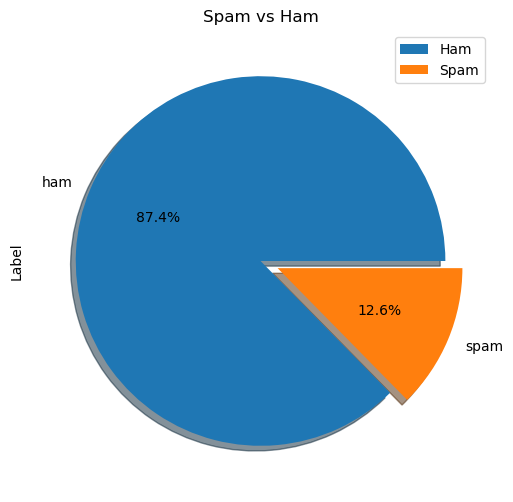

In [21]:
sms["Label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Text(0, 0.5, 'Frequency')

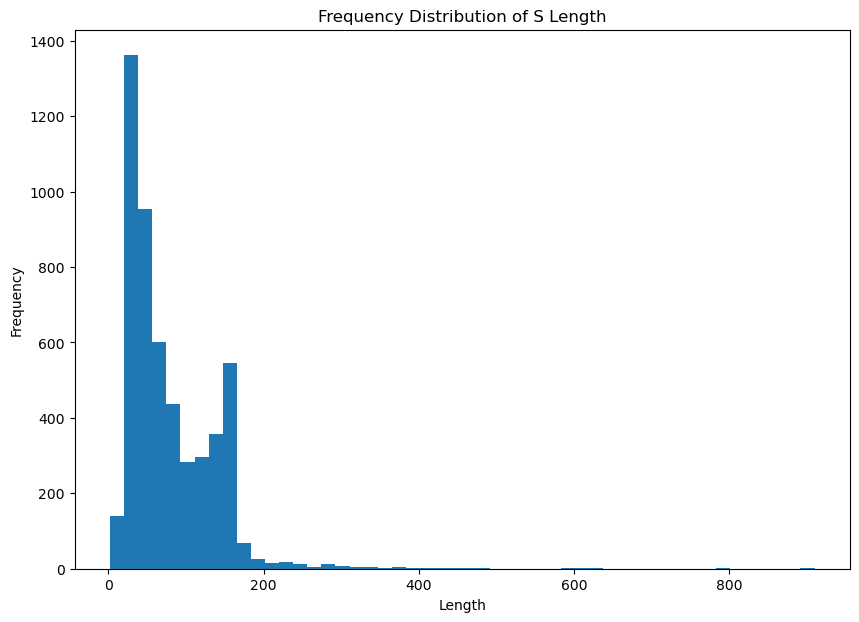

In [22]:
sms['length'].plot(bins=50, kind='hist', figsize=(10,7))
plt.title("Frequency Distribution of S Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

In [23]:
sms['length'].describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: length, dtype: float64

In [24]:
sms[sms['length'] == 910]['Email Text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

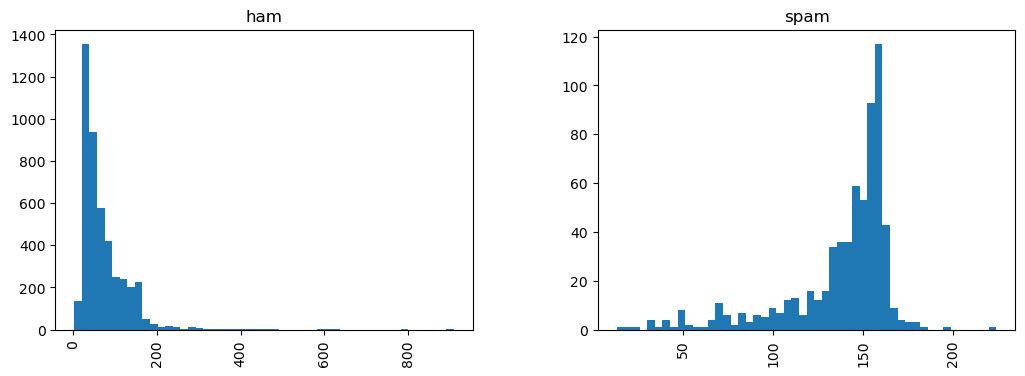

In [26]:
sms.hist(column='length', by='Label', bins=50,figsize=(12,4))

# Data Preprocessing

In [27]:
sms.loc[:,'Label']=sms.Label.map({'ham':0, 'spam':1})
sms.head()

C:\Users\iPC\AppData\Local\Temp\ipykernel_1548\62828506.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'Label']=sms.Label.map({'ham':0, 'spam':1})


,Label,Email Text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
count=CountVectorizer()
input=['REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode']

Email_Text =count.fit_transform(sms['Email Text'])
x_train, x_test, y_train, y_test= train_test_split(Email_Text, sms['Label'], test_size=0.20, random_state=1)


In [29]:
print(x_train.shape)
print(x_test.shape)

input=Email_Text[55]

(4135, 8672)
(1034, 8672)


In [30]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [31]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 1]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.97678916827853
Precision score: 1.0
Recall score: 0.8222222222222222
F1 score: 0.9024390243902439


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.97678916827853
Precision score: 1.0
Recall score: 0.8222222222222222
F1 score: 0.9024390243902439


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

MLP Classifier
Accuracy score: 0.97678916827853
Precision score: 1.0
Recall score: 0.8222222222222222
F1 score: 0.9024390243902439
